In [1]:
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import datetime as dt
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#read file
df = pd.read_csv('ShfeMulti_20191031.csv', index_col=None, header=None)
df.columns = ['Timestamp','Contract', 'time','last_price','volume','turnover','open_interest', #rename column
              'BP1','BV1','AP1','AV1',
              'BP2','BV2','AP2','AV2',
              'BP3','BV3','AP3','AV3',
              'BP4','BV4','AP4','AV4',
              'BP5','BV5','AP5','AV5']

pd.set_option('display.float_format', '{:.2f}'.format) #Set display decimals


#Convert datetime object as Index
df = df.sort_values(['time'], ascending=True) #Sort time
df.time  = pd.to_datetime(df.time) #Convert time to datetime object
df.time  = pd.to_datetime(df.time).dt.strftime('%H:%M:%S.%f')##Remove Y/M/D , I only want H/M/S 

#obtain time from 09:00 - 15:00, Not including night session
df = df[(df.time >= '08:59:00.000') & (df.time <='15:00:00.500')]
df = df.set_index('time')#Set time as index

#Obtaining Active contract names 
#df = df[['Contract','volume','turnover', 'BP1','BV1','AP1','AV1']]
#filter out option contracts, more than 6 characters are options contracts
df = df[df['Contract'].str.len() <= 6]
#Filter in Active Contract, all contracts doesn't work...
df['Contract1'] = df.Contract.str.slice(start=0,stop =2)
df['Contract2'] = df.Contract.str.slice(start=2)
temp = df.groupby('Contract').max().reset_index()
temp= temp[['volume','Contract1','Contract']]
temp = temp[temp.volume == temp.groupby('Contract1')['volume'].transform('max')]
main = temp.Contract.to_numpy()
df = df[df['Contract'].isin(main)] 
df = df.sort_values(['time','Contract'], ascending=True)

#Remove NaNs 
df.dropna(inplace = True)

df.sort_values(['Contract1'], ascending=True)

df.head()

rb = df[df.Contract1=='rb']
df

,Timestamp,Contract,last_price,volume,turnover,open_interest,BP1,BV1,AP1,AV1,BP2,BV2,AP2,AV2,BP3,BV3,AP3,AV3,BP4,BV4,AP4,AV4,BP5,BV5,AP5,AV5,Contract1,Contract2
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
08:59:00.500000,3283647182.29,wr2001,3660.00,0.00,0.00,30.00,3636.00,1.00,3690.00,1.00,3620.00,1.00,3720.00,1.00,3606.00,1.00,3760.00,1.00,3566.00,1.00,3786.00,1.00,3506.00,1.00,3880.00,2.00,wr,2001
09:00:00.500000,3283707180.75,ag1912,4352.00,663578.00,43350185370.00,811918.00,4351.00,110.00,4352.00,24.00,4350.00,1032.00,4353.00,5.00,4349.00,43.00,4354.00,62.00,4348.00,77.00,4355.00,18.00,4347.00,32.00,4356.00,451.00,ag,1912
09:00:00.500000,3283707180.77,al1912,13815.00,22590.00,1561775000.00,230674.00,13810.00,52.00,13815.00,13.00,13805.00,338.00,13820.00,68.00,13800.00,81.00,13825.00,29.00,13795.00,108.00,13830.00,59.00,13790.00,67.00,13835.00,186.00,al,1912
09:00:00.500000,3283707180.78,au1912,341.20,181304.00,61837871700.00,347730.00,341.05,7.00,341.20,15.00,341.00,6.00,341.25,53.00,340.95,4.00,341.30,5.00,340.90,15.00,341.35,10.00,340.85,102.00,341.40,8.00,au,1912
09:00:00.500000,3283707180.80,bu1912,2948.00,335662.00,9884005640.00,430862.00,2944.00,51.00,2948.00,2.00,2942.00,201.00,2950.00,47.00,2940.00,237.00,2952.00,158.00,2938.00,214.00,2954.00,149.00,2936.00,251.00,2956.00,254.00,bu,1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:00:00.000000,3305307025.49,rb2001,3367.00,2997816.00,101147520960.00,3195424.00,3366.00,112.00,3367.00,10.00,3365.00,1474.00,3368.00,1016.00,3364.00,678.00,3369.00,973.00,3363.00,539.00,3370.00,1334.00,3362.00,1170.00,3371.00,586.00,rb,2001
15:00:00.000000,3305307025.49,ru2001,12015.00,455718.00,54724009700.00,342110.00,12015.00,12.00,12020.00,98.00,12010.00,32.00,12025.00,87.00,12005.00,30.00,12030.00,211.00,12000.00,157.00,12035.00,133.00,11995.00,99.00,12040.00,147.00,ru,2001
15:00:00.000000,3305307025.50,sn2001,138340.00,20180.00,2789623880.00,39230.00,138330.00,4.00,138340.00,2.00,138320.00,1.00,138350.00,1.00,138300.00,4.00,138390.00,1.00,138290.00,3.00,138400.00,8.00,138280.00,3.00,138410.00,1.00,sn,2001


In [2]:
def midprice(df):
    midprice = (df.BP1 +df.AP1)/2
    return midprice

#Bid Ask Spread
def BAS(df):
    return (df.AP1 - df.BP1)

#Order Imbalance Ratio
def OIR(df):
    return ((df.BV1 - df.AV1)/(df.BV1 + df.AV1))

def ticksize(df):
    x=df['BP1'].diff()
    x = x.replace(0, np.nan)
    x.dropna(inplace=True)
    return abs(x.value_counts().idxmax())

def prob(df):
    return df[df>0].count()/df.count()

# Step 3 : Scatter Plots, observations.

1. We are choosing a contract with a high ticksize, high volume and local price discovery. In this case I choose RU that has enough volume, 99% price discovery and ticksize of 5.

I did not include threshold in this case. Stepping back to observe the dynamics of the signal.

In [3]:
rb = df[df.Contract1 == 'ru'] #We take RU2001 as example because it has the highest volume and local price discovery
rb1= rb.copy() #Take a copy so that we dont mess up the original data
rb1['OIR'] = OIR(rb).shift() #compute imbalance value, shift for
rb1['Midprice']=midprice(rb)
rb1['DM'] = midprice(rb).diff()/ticksize(rb)   #compute 1 periodmidprice change, scaled by tick size.
# DM1 matchs the prior actual mid price change
#rb1.dropna(inplace=True) # drop any NA values(midprice change ususally gives the first entry NaN)
#rb2 = rb1[rb1.DM1!=0]  #Take all points when mid price has changed, that means we ignore zero change

[]

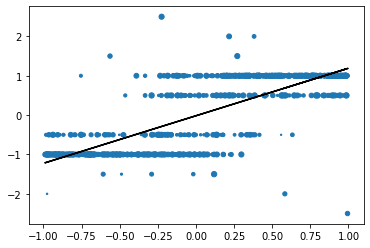

In [4]:
#Scatter Plot
rb2 = rb1.dropna()
rb2 = rb2[abs(rb2.DM) !=0]
y = rb2.DM  
x = rb2.OIR
b, m = polyfit(x, y, 1)
size = np.random.rand(41227)*30
plt.scatter(x,y, size)
plt.plot(x, b + m * x, '-', color = 'black')
plt.plot()

# Perform Plots for all contracts

In [5]:
pd.set_option('display.float_format', '{:.4f}'.format)
rb3 = rb2[['OIR','DM']].copy()
#rb3.DM[rb3.DM > 0] = 1
#rb3.DM[rb3.DM < 0] = -1
#rb3.OIR = round(rb3.OIR,1)  #so the bin is 10
#rb3.head(100)
#rb3.plot(kind= 'kde')
#rb3.DM.eq(1).groupby(rb3.OIR).mean()
#rb3['bin'] = pd.cut(rb3.OIR,20)
rb3

,OIR,DM
time,,
09:00:03.500000,0.9802,1.0000
09:00:04.000000,-0.8222,-0.5000
09:00:05.000000,0.7056,0.5000
09:00:12.000000,-0.2676,-1.0000
09:00:12.500000,0.8291,0.5000
...,...,...
14:59:33.500000,-0.9858,-1.0000
14:59:35.000000,0.8571,1.0000
14:59:43.000000,-0.8864,-1.0000


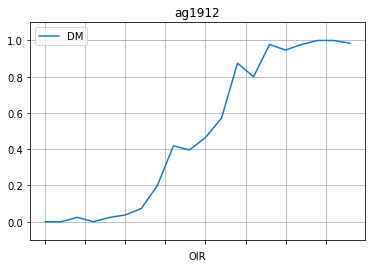

In [26]:
#Binning the Order imbalance indicator
s = rb3.groupby(pd.cut(rb3.OIR,20))['DM'].apply(prob)
s = pd.DataFrame(s)
s.plot(kind = 'line',title = df.Contract[1],grid =True ,ylim=[-0.1,1.1])

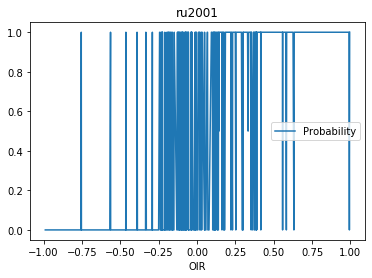

In [18]:
#Without binning
table = rb3.groupby('OIR')['DM'].apply(prob)
table = pd.DataFrame(table)
table.columns = ['Probability']
table.plot(title = rb2.Contract[1])


C:\Users\Sam\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


Contract
ag1912    AxesSubplot(0.125,0.125;0.775x0.755)
al1912    AxesSubplot(0.125,0.125;0.775x0.755)
au1912    AxesSubplot(0.125,0.125;0.775x0.755)
bu1912    AxesSubplot(0.125,0.125;0.775x0.755)
cu1912    AxesSubplot(0.125,0.125;0.775x0.755)
fu2001    AxesSubplot(0.125,0.125;0.775x0.755)
hc2001    AxesSubplot(0.125,0.125;0.775x0.755)
ni1912    AxesSubplot(0.125,0.125;0.775x0.755)
pb1912    AxesSubplot(0.125,0.125;0.775x0.755)
rb2001    AxesSubplot(0.125,0.125;0.775x0.755)
ru2001    AxesSubplot(0.125,0.125;0.775x0.755)
sn2001    AxesSubplot(0.125,0.125;0.775x0.755)
sp2001    AxesSubplot(0.125,0.125;0.775x0.755)
ss2002    AxesSubplot(0.125,0.125;0.775x0.755)
wr2001    AxesSubplot(0.125,0.125;0.775x0.755)
zn1912    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

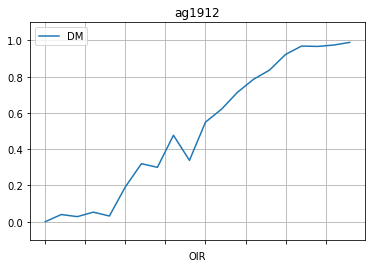

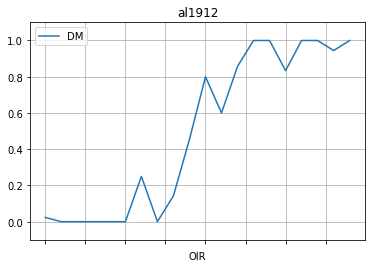

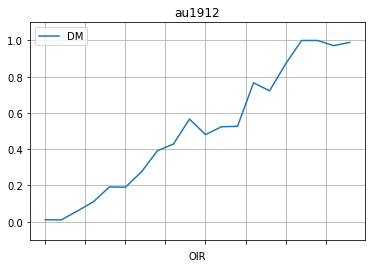

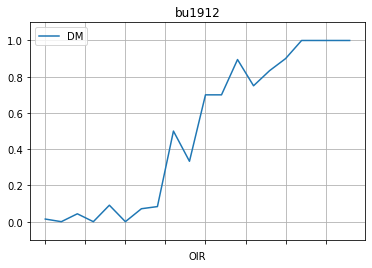

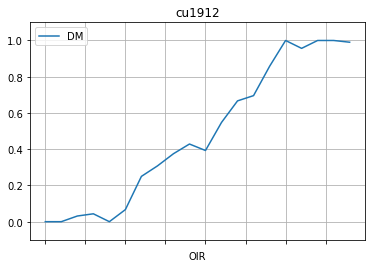

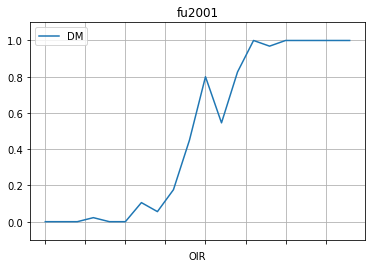

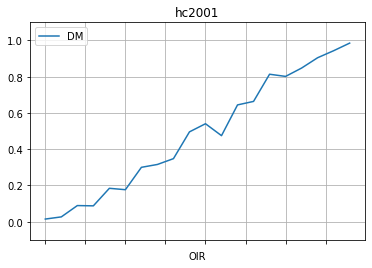

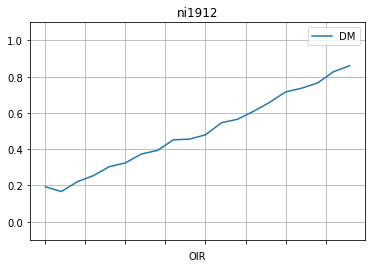

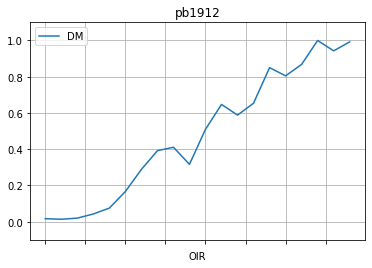

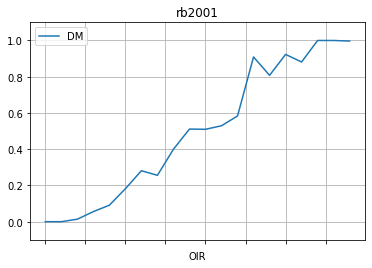

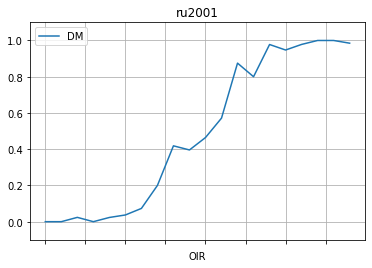

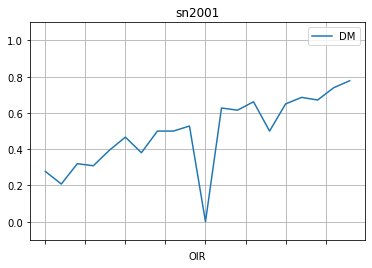

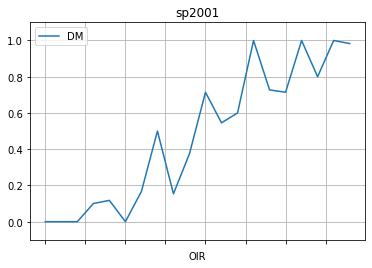

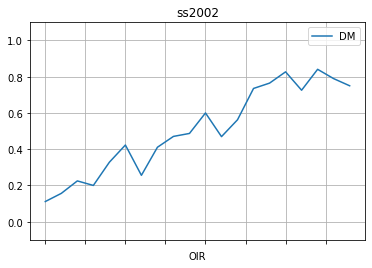

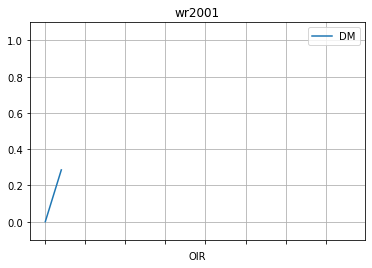

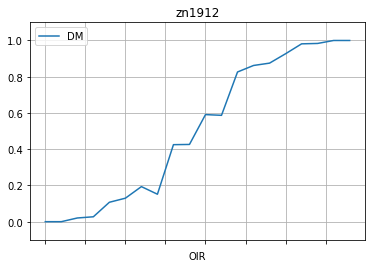

In [19]:
#Plot with Binning, no rounding
def main(df):
    df1= df.copy() #Take a copy so that we dont mess up the original data
    df1['OIR'] = OIR(df1).shift() #compute imbalance value, shift for
    df1['Midprice']=midprice(df1)
    df1['DM'] = midprice(df1).diff()/ticksize(df1)
    df1 = df1[['OIR','DM']]
    df1 = df1.dropna()
    df1 = df1[abs(df1.DM) !=0]
    df1.DM[df1.DM > 0] = 1
    df1.DM[df1.DM < 0] = -1
    s = df1.groupby(pd.cut(df1.OIR,20))['DM'].apply(prob) #Use a method with 20 bins for OIR
    s = pd.DataFrame(s)
    return s.plot(title = df.Contract[1],grid =True ,ylim=[-0.1,1.1])
    
grouped = df.groupby('Contract').apply(main)
grouped

Contract
ag1912    AxesSubplot(0.125,0.125;0.775x0.755)
al1912    AxesSubplot(0.125,0.125;0.775x0.755)
au1912    AxesSubplot(0.125,0.125;0.775x0.755)
bu1912    AxesSubplot(0.125,0.125;0.775x0.755)
cu1912    AxesSubplot(0.125,0.125;0.775x0.755)
fu2001    AxesSubplot(0.125,0.125;0.775x0.755)
hc2001    AxesSubplot(0.125,0.125;0.775x0.755)
ni1912    AxesSubplot(0.125,0.125;0.775x0.755)
pb1912    AxesSubplot(0.125,0.125;0.775x0.755)
rb2001    AxesSubplot(0.125,0.125;0.775x0.755)
ru2001    AxesSubplot(0.125,0.125;0.775x0.755)
sn2001    AxesSubplot(0.125,0.125;0.775x0.755)
sp2001    AxesSubplot(0.125,0.125;0.775x0.755)
ss2002    AxesSubplot(0.125,0.125;0.775x0.755)
wr2001    AxesSubplot(0.125,0.125;0.775x0.755)
zn1912    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

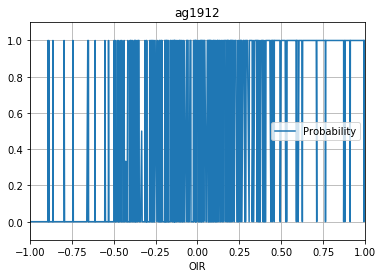

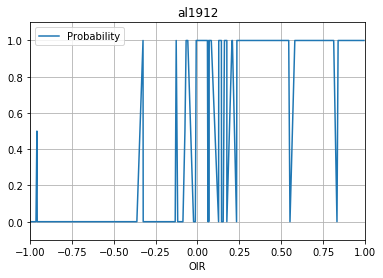

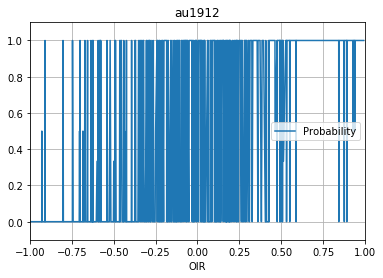

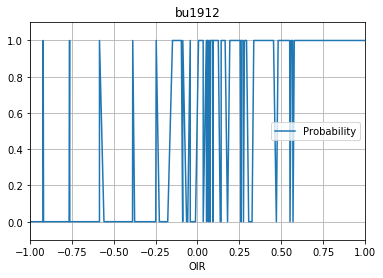

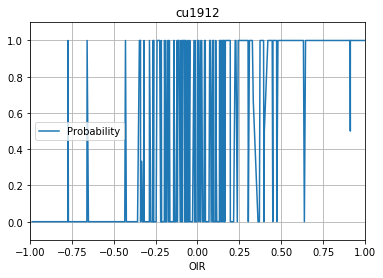

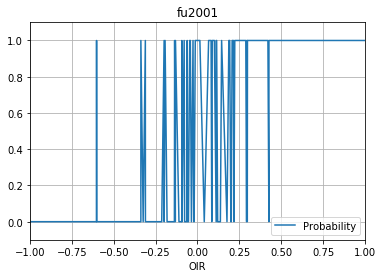

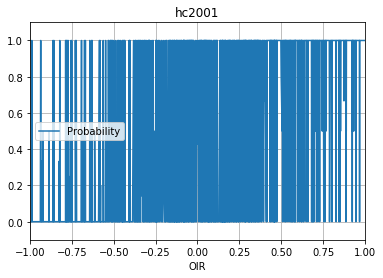

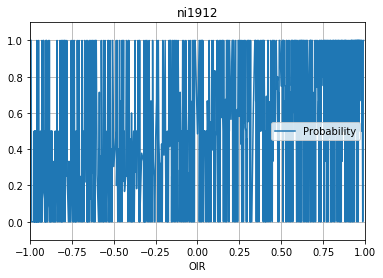

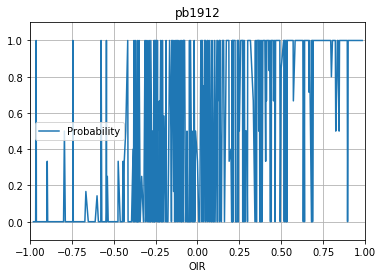

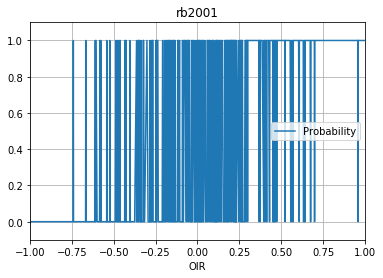

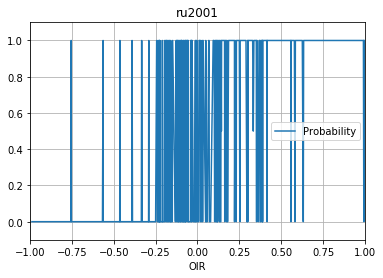

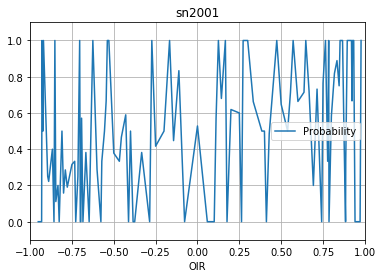

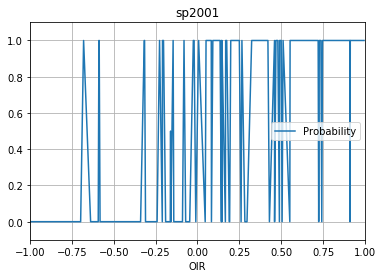

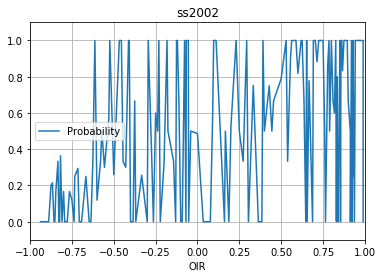

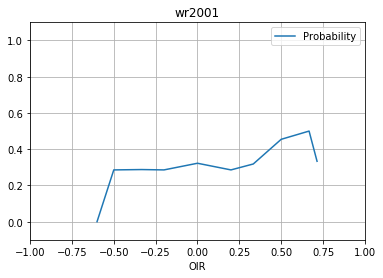

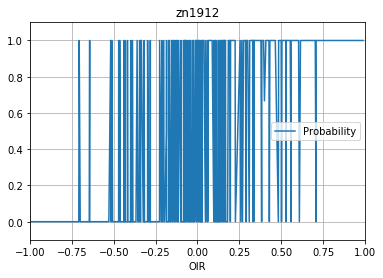

In [11]:
#Plot Without Binning
def main(df):
    df1= df.copy() #Take a copy so that we dont mess up the original data
    df1['OIR'] = OIR(df1).shift() #compute imbalance value, shift for
    df1['Midprice']=midprice(df1)
    df1['DM'] = midprice(df1).diff()/ticksize(df1)
    df1 = df1[['OIR','DM']]
    df1 = df1.dropna()
    df1 = df1[abs(df1.DM) !=0]
    df1.DM[df1.DM > 0] = 1
    df1.DM[df1.DM < 0] = -1
    #df1.OIR = round(df1.OIR,1) #into 100 bins
    df1 = df1.interpolate()
    table = df1.groupby('OIR')['DM'].apply(prob)
    table = pd.DataFrame(table)
    table.columns = ['Probability']
    return table.plot( title =df.Contract[1]  , grid =True ,xlim=[-1,1],ylim=[-0.1,1.1] )
    
grouped = df.groupby('Contract').apply(main)
grouped